In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D3-Pamela/S3/Office_Pamela-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
len(train_data),len(test_data)

(5760, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24, 1)
y_train.shape =  (5736,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
45/45 [==============================] - 3s 15ms/step - loss: 868.1016
Epoch 2/300
45/45 [==============================] - 1s 14ms/step - loss: 764.5034
Epoch 3/300
45/45 [==============================] - 1s 15ms/step - loss: 672.4668
Epoch 4/300
45/45 [==============================] - 1s 16ms/step - loss: 602.9065
Epoch 5/300
45/45 [==============================] - 1s 14ms/step - loss: 503.0798
Epoch 6/300
45/45 [==============================] - 1s 15ms/step - loss: 449.0448
Epoch 7/300
45/45 [==============================] - 1s 14ms/step - loss: 401.4207
Epoch 8/300
45/45 [==============================] - 1s 14ms/step - loss: 363.8976
Epoch 9/300
45/45 [==============================] - 1s 15ms/step - loss: 333.2613
Epoch 10/300
45/45 [==============================] - 1s 14ms/step - loss: 306.7414
Epoch 11/300
45/45 [==============================] - 1s 14ms/step - loss: 283.4673
Epoch 12/300
45/45 [==============================] - 1s 14ms/step - loss: 262.9310
E

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 2.4130651942382895
Root Mean Squared Error for LSTM Model for testing is: 2.959524872059227
Mean Absolute Error for LSTM Model for training is: 1.7754015962257088
Mean Absolute Error for LSTM Model for testing is: 1.9768744211706368
MAPE for LSTM Model for training is: 0.06814104428461892
MAPE for LSTM Model for testing is: 0.0817675610244058


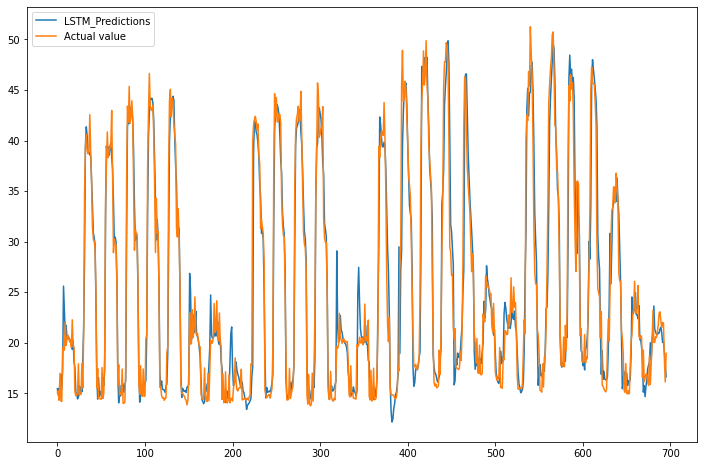

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([15.11666667]), array([15.43944], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.3227731]), array([0.42518005]), array([-1.22448356]), array([1.85559044]), array([-2.6220609]), array([-1.14961166]), array([2.19413426]), array([-6.25981]), array([-3.91369412]), array([1.26265984]), array([-1.98935153]), array([0.07750028]), array([0.09224332]), array([-0.0851813]), array([-0.11777306]), array([0.31878573]), array([-0.27377078]), array([2.91822472]), array([-0.5585537]), array([1.40869967]), array([-2.36762352]), array([-0.35924136]), array([-0.01431885]), array([0.53435478]), array([3.30790202]), array([-0.95925674]), array([-0.05809212]), array([-0.73992799]), array([2.79110044]), array([-3.01057981]), array([-0.51196442]), array([6.3784214]), array([-0.31098836]), array([-0.76044693]), array([-1.3787585]), array([-0.06636505]), array([-0.06457799]), array([3.96831029]), array([0.55597814]), array([-0.14391353]), array([-2.19108963]), array([-0.62367757]), array([-0.36712049]), array([-0.40047455]), array([0.75097008]), array([-1.15355644]), array([3.024

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([22.36934433]), array([-12.27790133]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(389, 307)